In [2]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import numpy as np
from matplotlib import pyplot as plt
import cufflinks as cf
cf.set_config_file(offline=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr
yf.pdr_override()


RED BELT

In [3]:
df1=pdr.get_data_yahoo('GOLD','2011-01-01', '2021-10-31')
df1=df1[['Open', 'Close']]
df1=df1.rename(columns={'Open':'Open_GOLD', 'Close':'Close_GOLD'})
df2=pdr.get_data_yahoo('AMZN','2010-01-01', '2021-10-31')
df2=df2[['Open', 'Close']]
df2=df2.rename(columns={'Open':'Open_AMZN', 'Close':'Close_AMZN'})
df3=pdr.get_data_yahoo('TSLA','2011-01-01', '2021-10-31')
df3=df3[['Open', 'Close']]
df3=df3.rename(columns={'Open':'Open_TSLA', 'Close':'Close_TSLA'})
df4=pdr.get_data_yahoo('NFLX','2011-01-01', '2021-10-31')
df4=df4[['Open', 'Close']]
df4=df4.rename(columns={'Open':'Open_NFLX', 'Close':'Close_NFLX'})
df5=pdr.get_data_yahoo('AAPL','2011-01-01', '2021-10-31')
df5=df5[['Open', 'Close']]
df5=df5.rename(columns={'Open':'Open_AAPL', 'Close':'Close_AAPL'})
df=df1.merge(df2, on='Date')
df=df.merge(df3,  on='Date')
df=df.merge(df4,  on='Date')
df=df.merge(df5,  on='Date')
df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_GOLD,Close_GOLD,Open_AMZN,Close_AMZN,Open_TSLA,Close_TSLA,Open_NFLX,Close_NFLX,Open_AAPL,Close_AAPL
Date,,,,,,,,,,
2010-12-31,52.860001,53.180000,181.960007,180.000000,5.314000,5.326000,25.578571,25.100000,11.533929,11.520000
2011-01-03,53.919998,52.590000,181.369995,184.220001,5.368000,5.324000,25.000000,25.487143,11.630000,11.770357
2011-01-04,52.230000,51.669998,186.149994,185.009995,5.332000,5.334000,25.907143,25.910000,11.872857,11.831786
2011-01-05,51.169998,49.900002,184.100006,187.419998,5.296000,5.366000,25.878571,25.675714,11.769643,11.928571
2011-01-06,50.169998,49.259998,186.500000,185.860001,5.366000,5.576000,25.168571,25.427143,11.954286,11.918929
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,19.760000,19.549999,3335.000000,3320.370117,950.530029,1024.859985,663.739990,671.659973,148.679993,148.639999
2021-10-26,19.459999,19.430000,3349.510010,3376.070068,1024.689941,1018.429993,673.760010,668.520020,149.330002,149.320007
2021-10-27,19.370001,19.389999,3388.000000,3392.489990,1039.660034,1037.859985,669.000000,662.919983,149.360001,148.850006


In [4]:

three_years=df.loc['2011-01-01': '2013-12-31']
three_years= three_years[['Close_GOLD','Close_AMZN','Close_TSLA','Close_NFLX','Close_AAPL']]
three_years['Return_GOLD']=three_years['Close_GOLD'].pct_change()
three_years['Return_AMZN']=three_years['Close_AMZN'].pct_change()
three_years['Return_TSLA']=three_years['Close_TSLA'].pct_change()
three_years['Return_NFLX']=three_years['Close_NFLX'].pct_change()
three_years['Return_AAPL']=three_years['Close_AAPL'].pct_change()
three_years= three_years[['Return_GOLD','Return_AMZN','Return_TSLA','Return_NFLX','Return_AAPL']]
three_years = three_years.dropna()
three_years 

,Return_GOLD,Return_AMZN,Return_TSLA,Return_NFLX,Return_AAPL
Date,,,,,
2011-01-04,-0.017494,0.004288,0.001878,0.016591,0.005219
2011-01-05,-0.034256,0.013026,0.005999,-0.009042,0.008180
2011-01-06,-0.012826,-0.008324,0.039135,-0.009681,-0.000808
2011-01-07,-0.003248,-0.001991,0.012912,0.007360,0.007161
2011-01-10,-0.001018,-0.004367,0.007436,0.047853,0.018833
...,...,...,...,...,...
2013-12-24,0.037193,-0.009233,0.054754,-0.005754,-0.004245
2013-12-26,0.000000,0.013001,0.027013,-0.003858,-0.006641
2013-12-27,0.009832,-0.015604,-0.028167,-0.025018,-0.006757


In [5]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T
no_of_asset_classes =5
no_of_portfolios =10000
collection_of_random_asset_weights=[]
portfolio_means=[]
portfolio_standard_deviations=[]
portfolio_sharpe_ratios=[]


In [6]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights/= sum(random_asset_weights)
    random_asset_weights =np.asmatrix(random_asset_weights)
    return random_asset_weights

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean =asset_weights* asset_means
    portfolio_mean =portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights =get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    A,B,C=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)
    index= portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))


In [7]:
index= portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
collection_of_random_asset_weights[index]


matrix([[0.00318903, 0.29273473, 0.33924536, 0.06892501, 0.29590587]])

In [8]:
R=collection_of_random_asset_weights[index]
wights= pd.DataFrame({'GOLD':[R[0,0]],'AMZN': [R[0,1]], 'TSLA': [R[0,2]],'NFLX': [R[0,3]],'AAPL': [R[0,4]]}, index=[three_years.last_valid_index()])
wights

,GOLD,AMZN,TSLA,NFLX,AAPL
2013-12-31,0.003189,0.292735,0.339245,0.068925,0.295906


In [9]:
capital =10000
R= capital*wights
R

,GOLD,AMZN,TSLA,NFLX,AAPL
2013-12-31,31.890302,2927.347272,3392.453617,689.250072,2959.058737


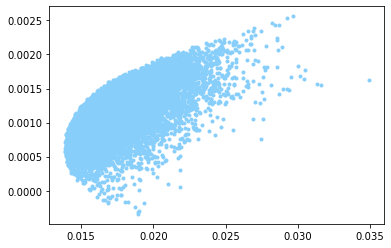

In [10]:
plt.plot(portfolio_standard_deviations,portfolio_means , 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

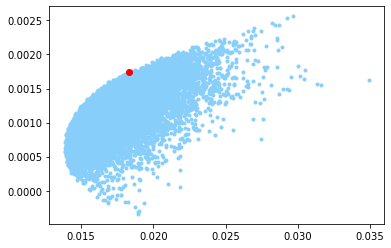

In [11]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color='r',marker='o')
plt.show()


(Managers are interested in the Sharpe Richio ratio because it measures the risk-adjusted return on investment, and is used to evaluate the performance of investment portfolios and to know if the profit is the result of good investment decisions or as a result of bearing high investment risks, and managers seek to diversify in portfolios to reduce the risk of sacrificing the return)

BLACK BELT 
PART 1

In [12]:
capital =10000
R= capital*wights
R.index.name='Date'
no_of_shares=R
no_of_shares

,GOLD,AMZN,TSLA,NFLX,AAPL
Date,,,,,
2013-12-31,31.890302,2927.347272,3392.453617,689.250072,2959.058737


In [13]:

no_of_shares_Open=R/df[[f'Open_{sym}' for sym in wights. columns]].loc[wights.last_valid_index()].values
print(no_of_shares_Open)

               GOLD      AMZN        TSLA       NFLX        AAPL
Date                                                            
2013-12-31  1.87811  7.418894  111.359425  13.200411  149.509433


In [14]:
#portfolio_fund
seven_years= df.loc['2013-12-31':]
seven_years['Open']=seven_years['Open_GOLD']*no_of_shares_Open['GOLD'].iloc[0]+seven_years['Open_AMZN']*no_of_shares_Open['AMZN'].iloc[0]+seven_years['Open_TSLA']*no_of_shares_Open['TSLA'].iloc[0]+seven_years['Open_NFLX']*no_of_shares_Open['NFLX'].iloc[0]+seven_years['Open_AAPL']*no_of_shares_Open['AAPL'].iloc[0]
seven_years['Close']=seven_years['Close_GOLD']*no_of_shares_Open['GOLD'].iloc[0]+seven_years['Close_AMZN']*no_of_shares_Open['AMZN'].iloc[0]+seven_years['Close_TSLA']*no_of_shares_Open['TSLA'].iloc[0]+seven_years['Close_NFLX']*no_of_shares_Open['NFLX'].iloc[0]+seven_years['Close_AAPL']*no_of_shares_Open['AAPL'].iloc[0]
seven_years=seven_years[['Open','Close']]
A_fund=(seven_years.copy())
A_fund

,Open,Close
Date,,
2013-12-31,10000.000000,10031.971916
2014-01-02,9987.556104,9967.597213
2014-01-03,9968.753145,9879.570789
2014-01-06,9866.952848,9811.178139
2014-01-07,9815.015100,9837.614226
...,...,...
2021-10-25,161620.304859,169887.281761
2021-10-26,170215.245744,169644.467080
2021-10-27,172109.341836,171785.730039


In [15]:


end_balance=seven_years['Close'].iloc[-1]
number_of_years=seven_years.shape[0]/252

Absolute_Return=((end_balance-capital)/capital)*100
CAGR=(((end_balance/capital)**(1/number_of_years))-1)*100
Informaton_Ratio= (seven_years['Close'].pct_change().mean()/seven_years ['Close'].pct_change().std())*((252)** 0.5)
print(Absolute_Return)
print(CAGR)
print(Informaton_Ratio)




1706.1749217057568
44.71672935622237
1.350573858545094


In [16]:
seven_years.Close.iplot()

PART 2

In [17]:
short_time=2
long_time=10
seven_years['Close_short_rolling']=seven_years['Close'].rolling(window=short_time).mean()
seven_years['Close_long_rolling']=seven_years['Close'].rolling(window=long_time).mean()
seven_years['window_diff']=seven_years['Close_long_rolling']-seven_years['Close_short_rolling']
seven_years['Open_1_cange']=seven_years['Open'].shift(1)
seven_years=seven_years.dropna()
seven_years

,Open,Close,Close_short_rolling,Close_long_rolling,window_diff,Open_1_cange
Date,,,,,,
2014-01-14,9590.116093,10129.357176,9831.614849,9861.728073,30.113224,9687.372823
2014-01-15,10331.844477,10225.397076,10177.377126,9881.070589,-296.306537,9590.116093
2014-01-16,10156.277872,10363.382075,10294.389576,9920.649076,-373.740500,10331.844477
2014-01-17,10320.980299,10295.713775,10329.547925,9962.263374,-367.284551,10156.277872
2014-01-21,10354.078398,10542.710234,10419.212005,10035.416584,-383.795421,10320.980299
...,...,...,...,...,...,...
2021-10-25,161620.304859,169887.281761,163488.665196,152274.364986,-11214.300210,156123.611042
2021-10-26,170215.245744,169644.467080,169765.874421,154913.041500,-14852.832921,161620.304859
2021-10-27,172109.341836,171785.730039,170715.098559,157681.243131,-13033.855428,170215.245744


In [18]:
X=seven_years.copy()

scaler=StandardScaler()
scaled_x=pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)
print(scaled_x)

y=np.where(X.Close.shift(+1)>= X.Close, 1, -1)
index= int(0.30*len(X))
X_train=X.iloc[:index]
X_test=X.iloc[index:]
y_train=y[:index]
y_test=y[index:]
Logistic=LogisticRegression()
Logistic=Logistic.fit(X_train,y_train)
predictions=Logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(Logistic.score(X_test,y_test))


                Open     Close  Close_short_rolling  Close_long_rolling  \
Date                                                                      
2014-01-14 -0.777206 -0.762858            -0.770860           -0.770858   
2014-01-15 -0.757871 -0.760357            -0.761842           -0.770348   
2014-01-16 -0.762448 -0.756765            -0.758790           -0.769303   
2014-01-17 -0.758154 -0.758527            -0.757873           -0.768204   
2014-01-21 -0.757292 -0.752096            -0.755534           -0.766273   
...              ...       ...                  ...                 ...   
2021-10-25  3.185677  3.396659             3.237010            2.988816   
2021-10-26  3.409716  3.390337             3.400740            3.058477   
2021-10-27  3.459088  3.446088             3.425499            3.131557   
2021-10-28  3.547445  3.588417             3.524716            3.215368   
2021-10-29  3.557591  3.676035             3.639897            3.298428   

            window_diff 

In [19]:
results=X_test.copy()
results['Close_Diff']=X_test.Close.shift(-1)-X_test.Close
results['predictions']=predictions
results['True_Label']=y_test
results['Daily_Return']=results['Close_Diff']*results['predictions']
results['Cumulative_Return']=results['Daily_Return'].cumsum()
results.dropna(inplace=True)
results

,Open,Close,Close_short_rolling,Close_long_rolling,window_diff,Open_1_cange,Close_Diff,predictions,True_Label,Daily_Return,Cumulative_Return
Date,,,,,,,,,,,
2016-05-17,14666.747952,14417.039376,14524.641909,14513.491205,-11.150704,14548.872156,222.555201,1,1,222.555201,222.555201
2016-05-18,14494.123092,14639.594576,14528.316976,14508.850866,-19.466110,14666.747952,72.915711,-1,-1,-72.915711,149.639490
2016-05-19,14650.681987,14712.510287,14676.052432,14550.178033,-125.874399,14494.123092,221.699198,-1,-1,-221.699198,-72.059708
2016-05-20,14794.647745,14934.209485,14823.359886,14594.968681,-228.391205,14650.681987,-58.945181,-1,-1,58.945181,-13.114526
2016-05-23,14965.941693,14875.264304,14904.736894,14643.284463,-261.452432,14794.647745,185.578366,1,1,185.578366,172.463840
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,156123.611042,157090.048630,156568.190286,149479.356909,-7088.833376,151240.019058,12797.233132,-1,-1,-12797.233132,-17429.043995
2021-10-25,161620.304859,169887.281761,163488.665196,152274.364986,-11214.300210,156123.611042,-242.814682,-1,-1,242.814682,-17186.229313
2021-10-26,170215.245744,169644.467080,169765.874421,154913.041500,-14852.832921,161620.304859,2141.262959,1,1,2141.262959,-15044.966354


PART 3

In [20]:
first_Close=results['Close'].iloc[0]
last_Close=results['Close'].iloc[-1]

information_ratio = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)
absolute_Close_op=((last_Close-first_Close)/first_Close)*100
A_CAGR = (((results['Close'].iloc[-1]/capital)**(252/len(results)))-1)
print(f'absolute of return of optimized portfolio=',absolute_Close_op,"%\n")
print(f'CAGR of the optimized portfolio=',A_CAGR,"%\n")
print(f'Information Ratio of our portfolio=',(information_ratio),"\n")


absolute of return of optimized portfolio= 1129.4636842950479 %

CAGR of the optimized portfolio= 0.6943353330375266 %

Information Ratio of our portfolio= 1.5806717333045186 



In [27]:
results['Open'].iplot()


In [25]:
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()
